<img src='https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/tools/frameworks/-/raw/main/img/OSI-SAF_banner.png' align='right' width='100%'/>

<a href="../Index.ipynb" target="_blank"><< Index</a>
<br>
<a href="./1_2_OSI_SAF_wind_file_structure.ipynb" target="_blank"><< Exploring OSI SAF wind product structure</a>

<font color="#138D75">**EUMETSAT OSI SAF Training Service**</font> <br>
**Copyright:** 2023 EUMETSAT <br>
**License:** MIT

<html>
  <div style="width:100%">
    <div style="float:left"><a href="https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.eumetsat.int%2Feumetlab%2Foceans%2Focean-training%2Fsensors%2Flearn-osi-saf-wind/HEAD?urlpath=%2Ftree%2F1_OSI_SAF_wind_introductory%2F1_3_OSI_SAF_mapping_wind.ipynb"><img src="https://mybinder.org/badge_logo.svg" alt="Open in Binder"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>
</html>

<div class="alert alert-block alert-success">
<h3>Learn OSI SAF wind: Introductory</h3></div>

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>
    
The following modules are prerequisites for this notebook, and will retrieve the data required here.
  - **<a href="./1_1a_OLCI_data_access_Data_Store.ipynb" target="_blank">1_1_OSI_SAF_wind_FTP_data_access.ipynb</a>**

</div>
<hr>

# 1.3 Mapping examples of OSI SAF wind products

### Data used

| Product Description | Product Navigator | OSI SAF website link | OSI SAF Identifier |
|:--------------------:|:-----------------------:|:-------------:|:-----------------:|
| Metop-B ASCAT 25 km Winds | EO:EUM:DAT:METOP:OAS025 | <a href="https://osi-saf.eumetsat.int/products/osi-102-b" target="_blank">link</a> | OSI-102-b | 
| Metop-C ASCAT 25 km Winds | EO:EUM:DAT:METOP:OAS025 | <a href="https://osi-saf.eumetsat.int/products/osi-102-c" target="_blank">link</a> | OSI-102-c | 

### Learning outcomes

At the end of this notebook you will know;
* How to open Metop Wind netcdf files
* Map ASCAT winds using cartopy

<div class="alert alert-info" role="alert">
    
## <a id='TOC-TOP'></a>Contents

</div>
    
 1. [Setting Parameters](#section1)
 1. [Mapping a wind dataset with cartopy](#section2)

<hr>

We begin by importing all of the libraries that we need to run this notebook. If you have built your python using the environment file provided in this repository, then you should have everything you need. For more information on building environment, please see the repository **<a href="../README.md" target="_blank">README</a>**.

In [1]:
# library imports
import matplotlib.pyplot as plt
import matplotlib.cm as mpl_cm
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import os                                     # a library that allows us access to basic operating system commands
import xarray as xr                           # a library that supports the use of multi-dimensional arrays in Python
import cmocean                                # colormaps for ocean products

<div class="alert alert-info" role="alert">

## <a id='section1'></a>1. Setting Parameters
[Back to top](#TOC-TOP)

</div>

Select the directory where the data you want to plot is available.

In [2]:
directory = 'products/ascat_b'

Choose a colormap for your data set. You can find more information on matplotlib colormaps <a href="https://matplotlib.org/stable/tutorials/colors/colormaps.html" target="_blank">here</a>. 

In [3]:
cmap = mpl_cm.get_cmap('jet')

We also recommend you have a look at <a href=" https://matplotlib.org/cmocean/" target="_blank">cmocean colormaps</a> .

In [4]:
# another choice could be
#cmap = cmocean.cm.speed

<div class="alert alert-info" role="alert">

## <a id='section2'></a>2. Mapping a wind dataset with cartopy
[Back to top](#TOC-TOP)

</div>

### Global Map
Let's start by visualising data on a wolrd map

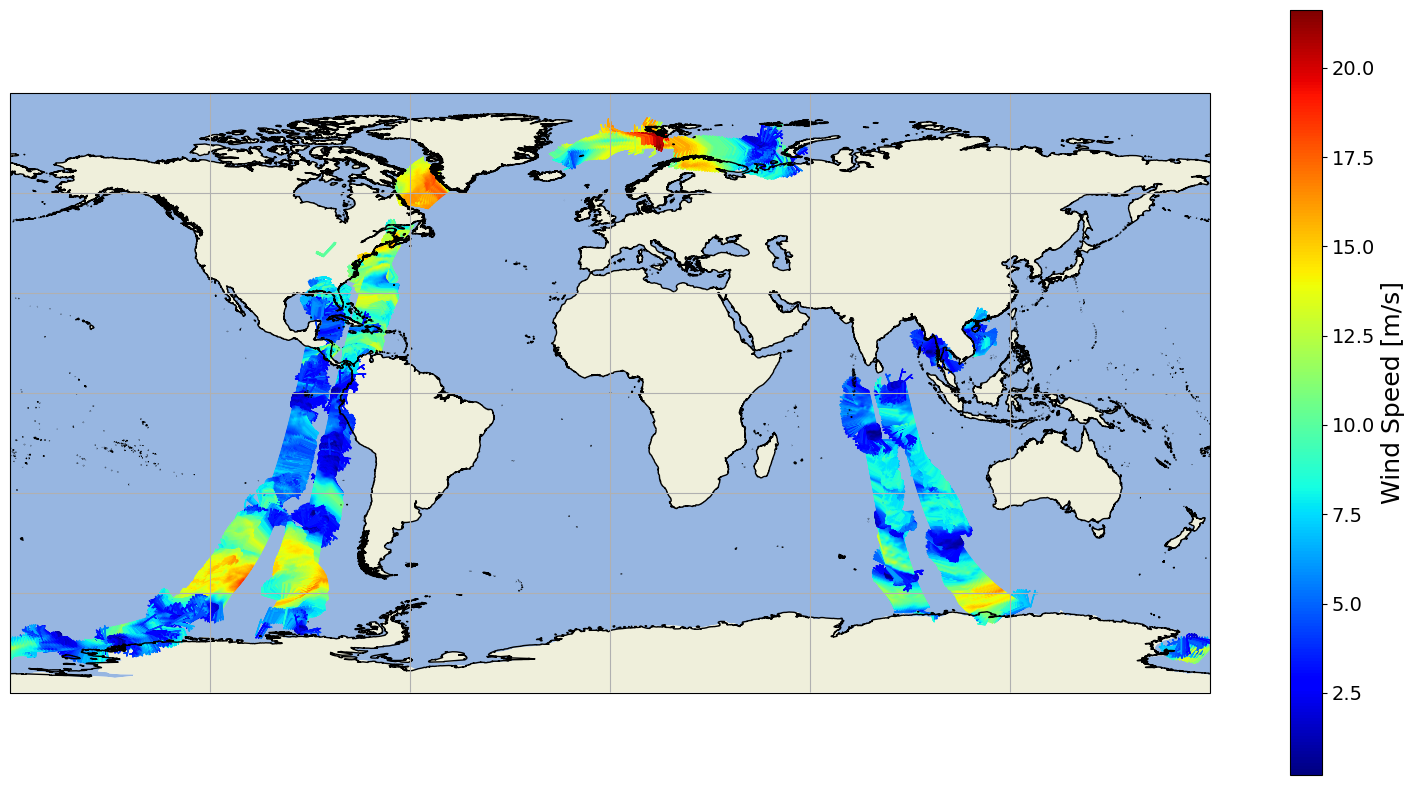

In [5]:
fig = plt.figure(figsize=(16,9))

# set data projection and request output projection
data_projection=ccrs.PlateCarree()
output_projection=ccrs.PlateCarree()

# define plot carateristics
ax = plt.axes([0.05,0.05,0.75,0.85], projection=output_projection)
ax.set_global()
ax.add_feature(cfeature.OCEAN, zorder=0)
ax.add_feature(cfeature.LAND, zorder=0)
ax.gridlines()
ax.coastlines('10m')

# open and plot osi saf netcdf wind files
for filename in os.listdir(directory):
    if filename.endswith(".nc"):
        nc = xr.open_dataset(directory + '/' + filename)
        lat = nc.variables['lat'][:]    
        lon = nc.variables['lon'][:]
        wind_speed = nc.variables['wind_speed'][:]
        wind_dir = nc.variables['wind_dir'][:]
        wvc_quality_flag  = nc.variables['wvc_quality_flag'][:]
        nc.close()
        
        # plotting wind barbs in cartopy requires u and v and components.
        u = np.full_like(lat,0)
        v = np.full_like(lat,0)
        u[:,:] = wind_speed * np.cos(np.radians(90 - wind_dir[:,:]))
        v[:,:] = wind_speed * np.sin(np.radians(90 - wind_dir[:,:]))
        stride = 1
        
        # plotting wind barbs
        im = ax.barbs(lon[::stride,::stride], lat[::stride,::stride], u[::stride,::stride], 
                  v[::stride,::stride], wind_speed[::stride,::stride], transform=data_projection, 
                  cmap=cmap,  linewidth=1, length=5)

# Adding a colorbar
axc = fig.add_axes((0.85,0.05,0.02,0.85))
cb = plt.colorbar(im, orientation='vertical', cax=axc)
cb.set_label('Wind Speed [m/s]', fontsize=18)
cb.ax.tick_params(labelsize=14)

### Zooming in
Depending on data you visualise on the global map, you can now zoom in a specific area.
Choose a box you want to zoom in by defining a geogrpahical area.

In [6]:
# setting geographical area (preset is an example you need to adapt to your data)
lon_min = -80
lon_max = -60
lat_min = 15
lat_max = 45

Plotting new figure in a orthographic projection

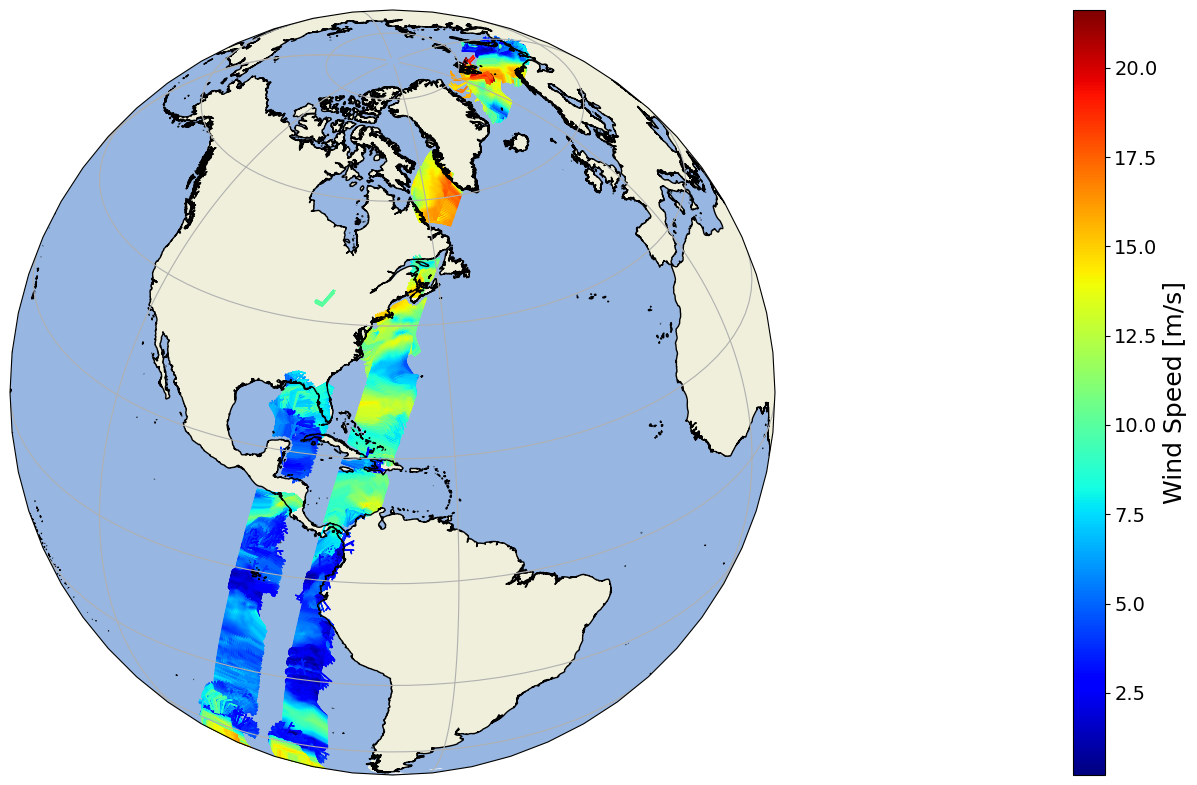

In [7]:
fig = plt.figure(figsize=(16,9))

# set data projection and request output projection
data_projection=ccrs.PlateCarree()
output_projection=ccrs.Orthographic((lon_max+lon_min)/2,(lat_max+lat_min)/2)

# define plot carateristics
ax = plt.axes([0.05,0.05,0.75,0.85], projection=output_projection)
ax.set_global()
ax.add_feature(cfeature.OCEAN, zorder=0)
ax.add_feature(cfeature.LAND, zorder=0)
ax.gridlines()
ax.coastlines('10m')

# open and plot osi saf netcdf wind files
for filename in os.listdir(directory):
    if filename.endswith(".nc"):
        nc = xr.open_dataset(directory + '/' + filename)
        lat = nc.variables['lat'][:]    
        lon = nc.variables['lon'][:]
        nplat=lat.to_numpy()
        nplon=lon.to_numpy()
        wind_speed = nc.variables['wind_speed'][:]
        wind_dir = nc.variables['wind_dir'][:]
        wvc_quality_flag  = nc.variables['wvc_quality_flag'][:]
        nc.close()
        
        # plotting wind barbs in cartopy requires u and v and components.
        u = np.full_like(nplat,0)
        v = np.full_like(nplat,0)
        u[:,:] = wind_speed * np.cos(np.radians(90 - wind_dir[:,:]))
        v[:,:] = wind_speed * np.sin(np.radians(90 - wind_dir[:,:]))
        stride = 1

       # plotting wind barbs
        im = ax.barbs(nplon[::stride,::stride], nplat[::stride,::stride], u[::stride,::stride], 
                  v[::stride,::stride], wind_speed[::stride,::stride], transform=data_projection, 
                  cmap=cmap,  linewidth=1, length=5)

# Adding a colorbar
axc = fig.add_axes((0.85,0.05,0.02,0.85))
cb = plt.colorbar(im, orientation='vertical', cax=axc)
cb.set_label('Wind Speed [m/s]', fontsize=18)
cb.ax.tick_params(labelsize=14)

### Full Zoom
Let's fully zoom into the geographical area you chose.

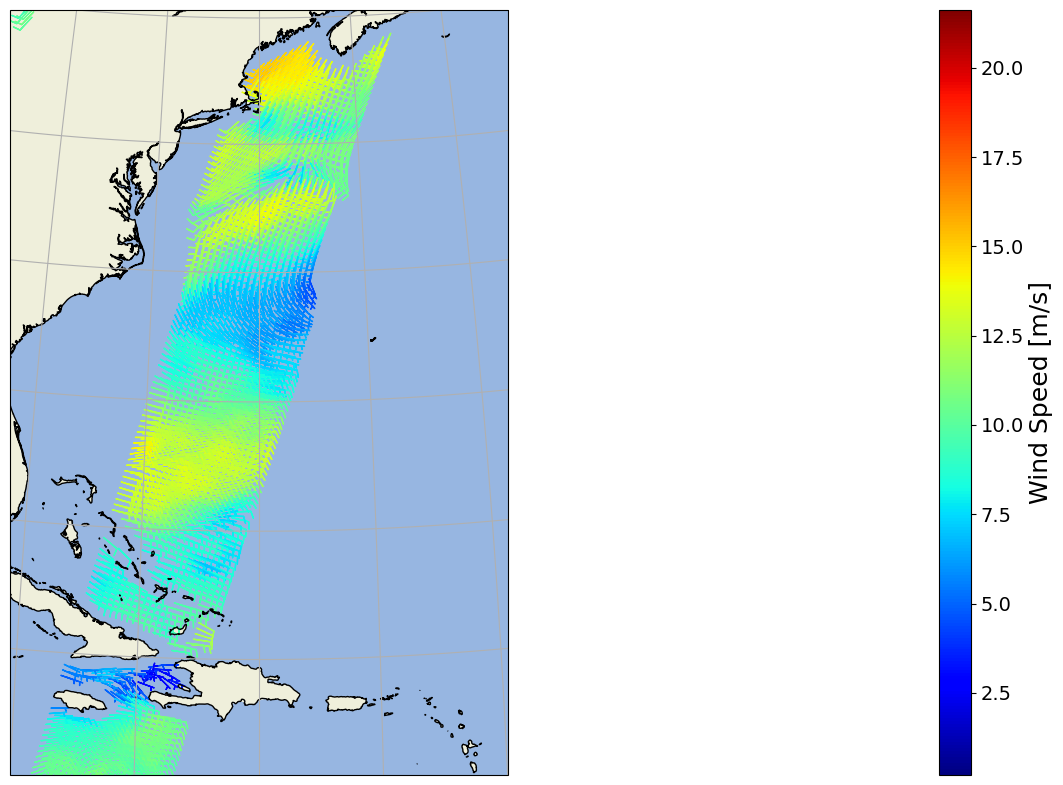

In [8]:
fig = plt.figure(figsize=(16,9))

# set data projection and request output projection
data_projection=ccrs.PlateCarree()
output_projection=ccrs.Orthographic((lon_max+lon_min)/2,(lat_max+lat_min)/2)

# define plot carateristics
ax = plt.axes([0.05,0.05,0.75,0.85], projection=output_projection)
ax.set_extent([lon_min, lon_max, lat_min, lat_max])
ax.add_feature(cfeature.OCEAN, zorder=0)
ax.add_feature(cfeature.LAND, zorder=0)
ax.gridlines()
ax.coastlines('10m')

# open and plot osi saf netcdf wind files
for filename in os.listdir(directory):
    if filename.endswith(".nc"):
        nc = xr.open_dataset(directory + '/' + filename)
        lat = nc.variables['lat'][:]    
        lon = nc.variables['lon'][:]
        nplat=lat.to_numpy()
        nplon=lon.to_numpy()
        wind_speed = nc.variables['wind_speed'][:]
        wind_dir = nc.variables['wind_dir'][:]
        wvc_quality_flag  = nc.variables['wvc_quality_flag'][:]
        nc.close()

        # plotting wind barbs in cartopy requires u and v and components.
        u = np.full_like(nplat,0)
        v = np.full_like(nplat,0)
        u[:,:] = wind_speed * np.cos(np.radians(90 - wind_dir[:,:]))
        v[:,:] = wind_speed * np.sin(np.radians(90 - wind_dir[:,:]))
        stride = 1

        # plotting wind barbs
        im = ax.barbs(nplon[::stride,::stride], nplat[::stride,::stride], u[::stride,::stride], 
                  v[::stride,::stride], wind_speed[::stride,::stride], transform=data_projection, 
                  cmap=cmap,  linewidth=1, length=5)

# Adding a colorbar
axc = fig.add_axes((0.85,0.05,0.02,0.85))
cb = plt.colorbar(im, orientation='vertical', cax=axc)
cb.set_label('Wind Speed [m/s]', fontsize=18)
cb.ax.tick_params(labelsize=14)

<a href="../Index.ipynb" target="_blank"><< Index</a>
<br>
<a href="./1_2_OSI_SAF_wind_file_structure.ipynb" target="_blank"><< Exploring OSI SAF wind product structure</a>
<hr>
<a href="https://gitlab.eumetsat.int/eumetlab/ocean">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a> | <a href=mailto:ops@eumetsat.int>Contact helpdesk for support </a> | <a href=mailto:Copernicus.training@eumetsat.int>Contact our training team to collaborate on and reuse this material</a></span></p>